In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
pwd

u'/home/lejay/research/Winter_2018'

## ELAIS

In [5]:
cat_elais = Table.read('CUT_deep_catalogs/CUT_ELAIS_deep.fits')
cat_elais.info()
cat_gal_elais = cat_elais[cat_elais['preds_median']<0.89]

<Table masked=True length=1335423>
    name      dtype 
------------ -------
      NUMBER   int64
          RA float64
         DEC float64
    zKDEPeak float64
      zKDE16 float64
  zKDEMedian float64
      zKDE84 float64
   MASS_BEST float64
    MASS_MED float64
   SSFR_BEST float64
    SSFR_MED float64
preds_median float32
      sfProb float64
       dzm_q float64
      dzm_sf float64


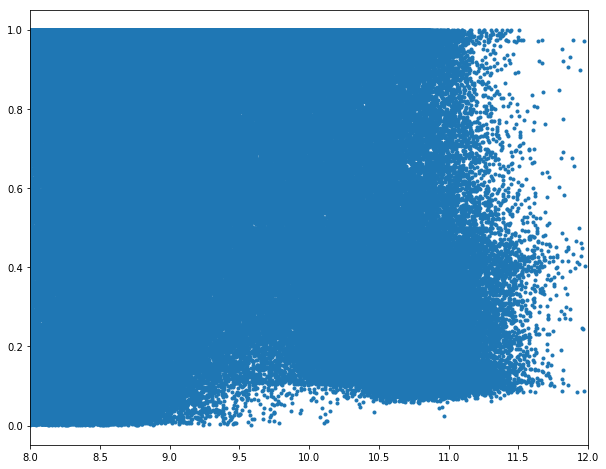

In [6]:
fig = plt.figure(figsize=(10,8))
plt.plot(cat_gal_elais['MASS_MED'],cat_gal_elais['sfProb'],'.')
plt.xlim([8,12])
plt.show()

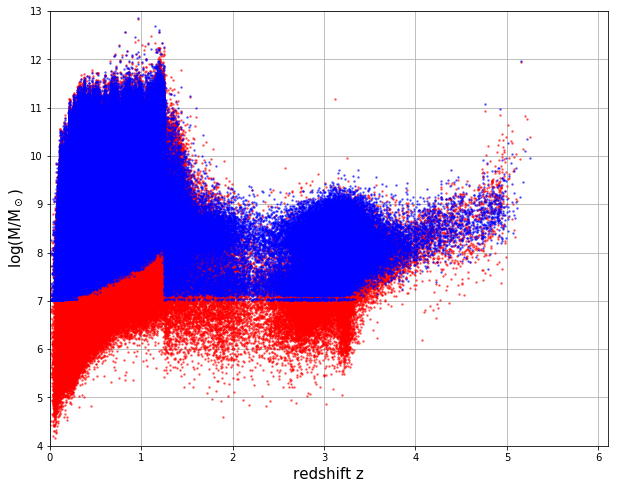

In [7]:
fig = plt.figure(figsize=(10,8))
plt.plot(cat_gal_elais['zKDEPeak'],cat_gal_elais['MASS_BEST'],'.r',markersize=3, alpha=0.5)
plt.plot(cat_gal_elais['zKDEPeak'],cat_gal_elais['MASS_MED'],'.b',markersize=3, alpha=0.5)

plt.ylim([4,13])
plt.xlim([0,6.1])
plt.xlabel('redshift z', fontsize=15)
plt.ylabel(r'log(M/M$_\odot$)', fontsize=15)
plt.grid(True)
plt.savefig('deep_fields_stats/completeness_elais.png')
plt.show()

In [8]:
cat_deep = Table.read('CUT_deep_catalogs/CUT_DEEP.fits')
cat_deep.info()
cat_gal_deep = cat_deep[cat_deep['preds_median']<0.89]

IOError: [Errno 2] No such file or directory: 'CUT_deep_catalogs/CUT_DEEP.fits'

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(cat_gal_deep['zKDEPeak'],cat_gal_deep['MASS_BEST'],'.r',markersize=3, alpha=0.5)
plt.plot(cat_gal_deep['zKDEPeak'],cat_gal_deep['MASS_MED'],'.b',markersize=3, alpha=0.5)

plt.ylim([4,13])
plt.xlim([0,6.1])
plt.xlabel('redshift z', fontsize=15)
plt.ylabel(r'log(M/M$_\odot$)', fontsize=15)
plt.grid(True)
plt.savefig('deep_fields_stats/completeness_deep.png')
plt.show()

In [ ]:
from astropy.cosmology import WMAP9

In [ ]:
m_mean = np.array([])
for z in np.arange(3,10)/10.:
    dis_l = WMAP9.comoving_distance(z-0.1).value
    dis_h = WMAP9.comoving_distance(z+0.1).value
    
    total_v = 4/3*np.pi*(dis_h**3 - dis_l**3) # Mpc^3
    survey_v = total_v * 3.5 / 41253.05  #Mpc^3
    density = 0.00003 # Mpc^-3
    num = int(density*survey_v)  # surface densisty propto dis**2
    print(num)
    
    cat_gal_z_slice = cat_gal[abs(cat_gal['zKDEMedian']-z)<0.1]
    cat_gal_z_slice.sort('MASS_MED')
    cat_gal_z_slice.reverse()
    cat_massive_gal_z = cat_gal_z_slice[:num]
    print(cat_massive_gal_z['MASS_MED'])
    m_mean = np.append(m_mean, sum( 10**(cat_massive_gal_z['MASS_MED'] - 10))/len(cat_massive_gal_z))

In [ ]:
print(m_mean)

## Radial Distribution

In [ ]:
from scipy.optimize import curve_fit
def nfw(r, rs, n):
    x = r / float(rs)
    y = np.piecewise(x, [x < 1, x==1, x > 1],
                     [lambda x:n*(x**2-1)**(-1)*(1-2/np.sqrt(1-x**2)*np.arctanh(np.sqrt((1-x)/(1+x)))), 
                      lambda x:n*1./3, 
                      lambda x:n*(x**2-1)**(-1)*(1-2/np.sqrt(x**2-1)*np.arctan(np.sqrt((x-1)/(1+x))))])
    return y

In [ ]:
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep.npy') 
# radial_COSMOS_uddd = np.load('CUT_deep_catalogs/countCOSMOS_uddd.npy')  
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep.npy')  
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep.npy')  
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd.npy')  
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep.npy')  

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_err.npy')
# radial_COSMOS_uddd_err = np.load('CUT_deep_catalogs/countCOSMOS_uddd_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep_err.npy')

radial_ud = np.load('count0.6.npy')  
radial_ud_err = np.load('count0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*466)/(598.+467+401+178+446)
radial_total_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total, fmt='.-k', yerr=radial_total_err,label='deep')
plt.errorbar(bin_edges[:-1], radial_ud, fmt='.-b', yerr=radial_ud_err, label='IR matched ultradeep')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_deep_layer.png')
 
plt.show()

In [ ]:
radial_COSMOS_d = np.load('CUT_deep_catalogs/massCOSMOS_deep.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/massXMM-LSS_deep.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/massELAIS_deep.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/massSXDS_uddd.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/massDEEP_deep.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/massCOSMOS_deep_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/massXMM-LSS_deep_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/massELAIS_deep_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/massSXDS_uddd_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/massDEEP_deep_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)

popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], 
                      p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')
print(popt)
fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total, fmt='.-k', yerr=radial_total_err)
plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'M/10$^{10}M_\odot$ kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)

plt.savefig('CUT_deep_catalogs/radial_mass_deep_layer.png')
 
plt.show()

In [ ]:
# z=0.6
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep0.6.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd0.6.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep0.6.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep0.6_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd0.6_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_6 = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_6_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)


# z=0.3
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep0.3.npy') #316
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.3.npy')  # 247
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep0.3.npy')  # 228
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd0.3.npy')  # 92
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep0.3.npy')  #  189

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep0.3_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.3_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep0.3_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd0.3_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep0.3_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_3 = (radial_COSMOS_d*316+radial_XMM*247+radial_ELAIS*228+radial_SXDS_uddd*92+radial_DEEP*189)/(316.+247+228+92+189)
radial_total_3_err = np.sqrt(radial_COSMOS_d_err**2*316**2+radial_XMM_err**2*247**2+radial_ELAIS_err**2*228**2+radial_SXDS_uddd_err**2*98**2+radial_DEEP_err**2*198**2)/(316.+247+228+92+189)


# popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_6, fmt='.-k', yerr=radial_total_6_err,label='z=0.6')
plt.errorbar(bin_edges[:-1], radial_total_3, fmt='.-b', yerr=radial_total_3_err,label='z=0.3')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_redshift.png')
 
plt.show()

In [ ]:
# z=0.6
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9_0.6.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9_0.6.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep_mass9_0.6.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9_0.6.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep_mass9_0.6.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9_0.6_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9_0.6_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep_mass9_0.6_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9_0.6_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep_mass9_0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_6 = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_6_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)


# z=0.3
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9_0.3.npy') #316
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9_0.3.npy')  # 247
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep_mass9_0.3.npy')  # 228
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9_0.3.npy')  # 92
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep_mass9_0.3.npy')  #  189

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9_0.3_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9_0.3_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep_mass9_0.3_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9_0.3_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep_mass9_0.3_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_3 = (radial_COSMOS_d*316+radial_XMM*247+radial_ELAIS*228+radial_SXDS_uddd*92+radial_DEEP*189)/(316.+247+228+92+189)
radial_total_3_err = np.sqrt(radial_COSMOS_d_err**2*316**2+radial_XMM_err**2*247**2+radial_ELAIS_err**2*228**2+radial_SXDS_uddd_err**2*98**2+radial_DEEP_err**2*198**2)/(316.+247+228+92+189)


# popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_6, fmt='.-k', yerr=radial_total_6_err,label='z=0.6')
plt.errorbar(bin_edges[:-1], radial_total_3, fmt='.-b', yerr=radial_total_3_err,label='z=0.3')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_redshift.png')
 
plt.show()

In [ ]:
# z=0.6
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9.5_0.6.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9.5_0.6.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep_mass9.5_0.6.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9.5_0.6.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep_mass9.5_0.6.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9.5_0.6_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9.5_0.6_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep_mass9.5_0.6_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9.5_0.6_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep_mass9.5_0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_6 = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_6_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)


# z=0.3
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9.5_0.3.npy') #316
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9.5_0.3.npy')  # 247
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep_mass9.5_0.3.npy')  # 228
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9.5_0.3.npy')  # 92
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep_mass9.5_0.3.npy')  #  189

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_mass9.5_0.3_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_mass9.5_0.3_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep_mass9.5_0.3_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_mass9.5_0.3_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep_mass9.5_0.3_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_3 = (radial_COSMOS_d*316+radial_XMM*247+radial_ELAIS*228+radial_SXDS_uddd*92+radial_DEEP*189)/(316.+247+228+92+189)
radial_total_3_err = np.sqrt(radial_COSMOS_d_err**2*316**2+radial_XMM_err**2*247**2+radial_ELAIS_err**2*228**2+radial_SXDS_uddd_err**2*98**2+radial_DEEP_err**2*198**2)/(316.+247+228+92+189)


# popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_6, fmt='.-k', yerr=radial_total_6_err,label='z=0.6')
plt.errorbar(bin_edges[:-1], radial_total_3, fmt='.-b', yerr=radial_total_3_err,label='z=0.3')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_redshift.png')
 
plt.show()

In [ ]:
radial_COSMOS_d_h = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.3.npy') #598
radial_XMM_h = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.3.npy')  # 467
radial_ELAIS_h = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.3.npy')  # 401
radial_SXDS_uddd_h = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.3.npy')  # 178
radial_DEEP_h = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.3.npy')  #  446

radial_COSMOS_d_h_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.3_err.npy')
radial_XMM_h_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.3_err.npy')
radial_ELAIS_h_err = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.3_err.npy')
radial_SXDS_uddd_h_err = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.3_err.npy')
radial_DEEP_h_err = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.3_err.npy')

radial_total_h_3 = (radial_COSMOS_d_h*598+radial_XMM_h*467+radial_ELAIS_h*401+radial_SXDS_uddd_h*178+radial_DEEP_h*446)/(598.+467+401+178+446)
radial_total_h_3_err = np.sqrt(radial_COSMOS_d_h_err**2*598**2+radial_XMM_h_err**2*467**2+radial_ELAIS_h_err**2*401**2+radial_SXDS_uddd_h_err**2*178**2+radial_DEEP_h_err**2*446**2)/(598.+467+401+178+446)

# high mass, z=0.6
radial_COSMOS_d_h = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.6.npy') #316
radial_XMM_h = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.6.npy')  # 247
radial_ELAIS_h = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.6.npy')  # 228
radial_SXDS_uddd_h = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.6.npy')  # 92
radial_DEEP_h = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.6.npy')  #  189

radial_COSMOS_d_h_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.6_err.npy')
radial_XMM_h_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.6_err.npy')
radial_ELAIS_h_err = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.6_err.npy')
radial_SXDS_uddd_h_err = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.6_err.npy')
radial_DEEP_h_err = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.6_err.npy')

radial_total_h = (radial_COSMOS_d_h*316+radial_XMM_h*247+radial_ELAIS_h*228+radial_SXDS_uddd_h*92+radial_DEEP_h*189)/(316.+247+228+92+189)
radial_total_h_err = np.sqrt(radial_COSMOS_d_h_err**2*316**2+radial_XMM_h_err**2*247**2+radial_ELAIS_h_err**2*228**2+radial_SXDS_uddd_h_err**2*92**2+radial_DEEP_h_err**2*189**2)/(316.+247+228+92+189)

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_h_3, fmt='.-k', yerr=radial_total_h_3_err,label='z=0.3')
plt.errorbar(bin_edges[:-1], radial_total_h, fmt='.-b', yerr=radial_total_h_err,label='z=0.6')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_redshift_highmass.png')

plt.show()

In [ ]:
# z=0.6
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep0.6.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd0.6.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep0.6.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep0.6_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd0.6_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_6 = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_6_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)

# sf
radial_COSMOS_d_sf = np.load('CUT_deep_catalogs/countCOSMOS_deep_sf_0.6.npy') #598
radial_XMM_sf = np.load('CUT_deep_catalogs/countXMM-LSS_deep_sf_0.6.npy')  # 467
radial_ELAIS_sf = np.load('CUT_deep_catalogs/countELAIS_deep_sf_0.6.npy')  # 401
radial_SXDS_uddd_sf = np.load('CUT_deep_catalogs/countSXDS_uddd_sf_0.6.npy')  # 178
radial_DEEP_sf = np.load('CUT_deep_catalogs/countDEEP_deep_sf_0.6.npy')  #  446

radial_COSMOS_d_sf_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_sf_0.6_err.npy')
radial_XMM_sf_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_sf_0.6_err.npy')
radial_ELAIS_sf_err = np.load('CUT_deep_catalogs/countELAIS_deep_sf_0.6_err.npy')
radial_SXDS_uddd_sf_err = np.load('CUT_deep_catalogs/countSXDS_uddd_sf_0.6_err.npy')
radial_DEEP_sf_err = np.load('CUT_deep_catalogs/countDEEP_deep_sf_0.6_err.npy')

radial_total_sf = (radial_COSMOS_d_sf*598+radial_XMM_sf*467+radial_ELAIS_sf*401+radial_SXDS_uddd_sf*178+radial_DEEP_sf*446)/(598.+467+401+178+446)
radial_total_sf_err = np.sqrt(radial_COSMOS_d_sf_err**2*598**2+radial_XMM_sf_err**2*467**2+radial_ELAIS_sf_err**2*401**2+radial_SXDS_uddd_sf_err**2*178**2+radial_DEEP_sf_err**2*446**2)/(598.+467+401+178+446)

# q
radial_COSMOS_d_q = np.load('CUT_deep_catalogs/countCOSMOS_deep_q_0.6.npy') #316
radial_XMM_q = np.load('CUT_deep_catalogs/countXMM-LSS_deep_q_0.6.npy')  # 247
radial_ELAIS_q = np.load('CUT_deep_catalogs/countELAIS_deep_q_0.6.npy')  # 228
radial_SXDS_uddd_q = np.load('CUT_deep_catalogs/countSXDS_uddd_q_0.6.npy')  # 92
radial_DEEP_q = np.load('CUT_deep_catalogs/countDEEP_deep_q_0.6.npy')  #  189

radial_COSMOS_d_q_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_q_0.6_err.npy')
radial_XMM_q_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_q_0.6_err.npy')
radial_ELAIS_q_err = np.load('CUT_deep_catalogs/countELAIS_deep_q_0.6_err.npy')
radial_SXDS_uddd_q_err = np.load('CUT_deep_catalogs/countSXDS_uddd_q_0.6_err.npy')
radial_DEEP_q_err = np.load('CUT_deep_catalogs/countDEEP_deep_q_0.6_err.npy')

radial_total_q = (radial_COSMOS_d_q*598+radial_XMM_q*467+radial_ELAIS_q*401+radial_SXDS_uddd_q*178+radial_DEEP_q*446)/(598.+467+401+178+446)
radial_total_q_err = np.sqrt(radial_COSMOS_d_q_err**2*598**2+radial_XMM_q_err**2*467**2+radial_ELAIS_q_err**2*401**2+radial_SXDS_uddd_q_err**2*178**2+radial_DEEP_q_err**2*446**2)/(598.+467+401+178+446)


# popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')
fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_6, fmt='.-k', yerr=radial_total_6_err)
plt.errorbar(bin_edges[:-1], radial_total_sf, fmt='.-b', yerr=radial_total_sf_err,label='sf')
plt.errorbar(bin_edges[:-1], radial_total_q, fmt='.-r', yerr=radial_total_q_err,label='q')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_sfq.png')
 
plt.show()

In [ ]:
# z=0.6
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6.npy') #598
radial_XMM = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6.npy')  # 467
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS_deep0.6.npy')  # 401
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd0.6.npy')  # 178
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP_deep0.6.npy')  #  446

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_deep0.6_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep0.6_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_deep0.6_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd0.6_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_deep0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total_6 = (radial_COSMOS_d*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS_uddd*178+radial_DEEP*446)/(598.+467+401+178+446)
radial_total_6_err = np.sqrt(radial_COSMOS_d_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_uddd_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)


# low mass
radial_COSMOS_d_l = np.load('CUT_deep_catalogs/countCOSMOS_deep_l_0.6.npy') #598
radial_XMM_l = np.load('CUT_deep_catalogs/countXMM-LSS_deep_l_0.6.npy')  # 467
radial_ELAIS_l = np.load('CUT_deep_catalogs/countELAIS_deep_l_0.6.npy')  # 401
radial_SXDS_uddd_l = np.load('CUT_deep_catalogs/countSXDS_uddd_l_0.6.npy')  # 178
radial_DEEP_l = np.load('CUT_deep_catalogs/countDEEP_deep_l_0.6.npy')  #  446

radial_COSMOS_d_l_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_l_0.6_err.npy')
radial_XMM_l_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_l_0.6_err.npy')
radial_ELAIS_l_err = np.load('CUT_deep_catalogs/countELAIS_deep_l_0.6_err.npy')
radial_SXDS_uddd_l_err = np.load('CUT_deep_catalogs/countSXDS_uddd_l_0.6_err.npy')
radial_DEEP_l_err = np.load('CUT_deep_catalogs/countDEEP_deep_l_0.6_err.npy')

radial_total_l = (radial_COSMOS_d_l*598+radial_XMM_l*467+radial_ELAIS_l*401+radial_SXDS_uddd_l*178+radial_DEEP_l*446)/(598.+467+401+178+446)
radial_total_l_err = np.sqrt(radial_COSMOS_d_l_err**2*598**2+radial_XMM_l_err**2*467**2+radial_ELAIS_l_err**2*401**2+radial_SXDS_uddd_l_err**2*178**2+radial_DEEP_l_err**2*446**2)/(598.+467+401+178+446)

# high mass
radial_COSMOS_d_h = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.6.npy') #598
radial_XMM_h = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.6.npy')  # 467
radial_ELAIS_h = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.6.npy')  # 401
radial_SXDS_uddd_h = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.6.npy')  # 178
radial_DEEP_h = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.6.npy')  #  446

radial_COSMOS_d_h_err = np.load('CUT_deep_catalogs/countCOSMOS_deep_h_0.6_err.npy')
radial_XMM_h_err = np.load('CUT_deep_catalogs/countXMM-LSS_deep_h_0.6_err.npy')
radial_ELAIS_h_err = np.load('CUT_deep_catalogs/countELAIS_deep_h_0.6_err.npy')
radial_SXDS_uddd_h_err = np.load('CUT_deep_catalogs/countSXDS_uddd_h_0.6_err.npy')
radial_DEEP_h_err = np.load('CUT_deep_catalogs/countDEEP_deep_h_0.6_err.npy')

radial_total_h = (radial_COSMOS_d_h*598+radial_XMM_h*467+radial_ELAIS_h*401+radial_SXDS_uddd_h*178+radial_DEEP_h*446)/(598.+467+401+178+446)
radial_total_h_err = np.sqrt(radial_COSMOS_d_h_err**2*598**2+radial_XMM_h_err**2*467**2+radial_ELAIS_h_err**2*401**2+radial_SXDS_uddd_h_err**2*178**2+radial_DEEP_h_err**2*446**2)/(598.+467+401+178+446)


# popt,pcov = curve_fit(nfw, bin_edges[1:-1], radial_total[1:],sigma=radial_total_err[1:], p0=[180,6e-5],bounds=[(0,0),(200,1e-4)], method='trf')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_6, fmt='.-k', yerr=radial_total_6_err)
plt.errorbar(bin_edges[:-1], radial_total_l, fmt='.-g', yerr=radial_total_l_err,label='low')
plt.errorbar(bin_edges[:-1], radial_total_h, fmt='.-m', yerr=radial_total_h_err,label='high')
# plt.plot(np.linspace(10,700,num=100),nfw(np.linspace(10,500,num=100),popt[0],popt[1]),'--k',alpha=0.7,label='NFW fit')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_lowhigh.png')
 
plt.show()

In [ ]:
radial_20 = np.load('CUT_deep_catalogs/countELAIS_random20.npy')
radial_20_err = np.load('CUT_deep_catalogs/countELAIS_random20_err.npy')
radial_40 = np.load('CUT_deep_catalogs/countELAIS_random40.npy')
radial_40_err = np.load('CUT_deep_catalogs/countELAIS_random40_err.npy')
radial_50 = np.load('CUT_deep_catalogs/countELAIS_random50.npy')
radial_50_err = np.load('CUT_deep_catalogs/countELAIS_random50_err.npy')
radial_60 = np.load('CUT_deep_catalogs/countELAIS_random60.npy')
radial_60_err = np.load('CUT_deep_catalogs/countELAIS_random60_err.npy')
radial_80 = np.load('CUT_deep_catalogs/countELAIS_random80.npy')
radial_80_err = np.load('CUT_deep_catalogs/countELAIS_random80_err.npy')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_20, fmt='.-', yerr=radial_20_err,label='20',alpha=0.3)
plt.errorbar(bin_edges[:-1], radial_40, fmt='.-', yerr=radial_40_err,label='40',alpha=0.3)
plt.errorbar(bin_edges[:-1], radial_60, fmt='.-', yerr=radial_60_err,label='60',alpha=0.3)
plt.errorbar(bin_edges[:-1], radial_80, fmt='.-', yerr=radial_80_err,label='80',alpha=0.3)
plt.errorbar(bin_edges[:-1], radial_50, fmt='.-', yerr=radial_50_err,label='50',alpha=0.3)
plt.errorbar(bin_edges[:-1], radial_ELAIS, fmt='.-', yerr=radial_ELAIS_err,label='100')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_deep_layer.png')
 
plt.show()

In [ ]:
radial_deep = np.load('CUT_deep_catalogs/countDEEP.npy') #669
radial_deep_cor =  np.load('CUT_deep_catalogs/countDEEP_bkgcor.npy')  # 219
radial_deep_err = np.load('CUT_deep_catalogs/countDEEP_err.npy')
radial_deep_cor_err = np.load('CUT_deep_catalogs/countDEEP_bkgcor_err.npy')
bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_deep, fmt='.-k', yerr=radial_deep_err)
plt.errorbar(bin_edges[:-1], radial_deep_cor, fmt='.-b', yerr=radial_deep_cor_err)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_deep_layer.png')

plt.show()

In [ ]:
radial_deep = np.load('CUT_deep_catalogs/countDEEP.npy') #669
radial_ud =  np.load('count_cut11.5.npy')  # 219
radial_deep_err = np.load('CUT_deep_catalogs/countDEEP_err.npy')
radial_ud_err = np.load('count_cut11.5_err.npy')
bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total_h, fmt='.-k', yerr=radial_total_h_err, label='deep')
plt.errorbar(bin_edges[:-1], radial_ud, fmt='.-b', yerr=radial_ud_err,label='ud')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_deep_ud.png')
 
plt.show()

In [ ]:
# sns.set_style("ticks")
sns.set_palette(sns.hls_palette(5, l=.3, s=.8))

radial_6 = np.load('count_cut11.5_0.6.npy')
radial_9 = np.load('count_cut11.5_0.9.npy')
radial_12 = np.load('count_cut11.5_1.2.npy')
radial_15 = np.load('count_cut11.5_1.5.npy') 
radial_6_err = np.load('count_cut11.5_0.6_err.npy')
radial_9_err = np.load('count_cut11.5_0.9_err.npy')
radial_12_err = np.load('count_cut11.5_1.2_err.npy')
radial_15_err = np.load('count_cut11.5_1.5_err.npy') 
bin_edges = np.load('bin_edges.npy')

fig = plt.figure(figsize=(10, 9))
plt.errorbar(bin_edges[:-1], radial_total_h, fmt='.-k', yerr=radial_total_h_err, label='0.3',linewidth=2)
plt.errorbar(bin_edges[:-1], radial_6, fmt='.-', yerr=radial_6_err, label='0.6',linewidth=2)
plt.errorbar(bin_edges[:-1], radial_9, fmt='.-', yerr=radial_9_err, label='0.9',linewidth=2)
plt.errorbar(bin_edges[:-1], radial_12, fmt='.-', yerr=radial_12_err, label='1.2',linewidth=2)
plt.errorbar(bin_edges[:-1], radial_15, fmt='.-', yerr=radial_15_err, label='1.5',linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.show()